In [1]:
import csv
import time
import os
from datetime import datetime
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import requests

# Function to save data to CSV file
def save_to_csv(data):
    file_name = 'CNN-ARABIA-FINAL.csv'
    if not os.path.exists(file_name):
        with open(file_name, 'w', newline='', encoding='utf-8') as csvfile:
            writer = csv.writer(csvfile)

    with open(file_name, 'a', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        for row in data:
            writer.writerow(row)


# Function to get article content from URL
def get_article_content(article_url):
    try:
        # Open the article URL
        driver.get(article_url)
        
        # Wait for the article content to load
        article_content = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, 'div.clearfix.article-body.wysiwyg.weptVpoutA'))
        )
        
        # Extract text from <p> elements within the article content
        paragraphs = article_content.find_elements(By.TAG_NAME, 'p')
        content = '\n'.join([p.text.strip() for p in paragraphs])
        
        return content
    except Exception as e:
        print(f"An error occurred while scraping content from {article_url}: {e}")
        return None

# List of URLs to scrape along with their corresponding category names
urls_categories = [
    ('https://arabic.cnn.com/middle-east', 'middle-east'),
    ('https://arabic.cnn.com/travel', 'travel'),
    ('https://arabic.cnn.com/sport','sport'),
    ('https://arabic.cnn.com/science-and-health', 'science-and-health'),
    ('https://arabic.cnn.com/entertainment', 'entertainment'),
    ('https://arabic.cnn.com/style', 'style'),
    ('https://arabic.cnn.com/world', 'world')
]

# Initialize the WebDriver
driver = webdriver.Chrome()

try:
    for url, category_name in urls_categories:
        # Open the webpage
        driver.get(url)
        print('now scraping on ',url)
        # Wait for the target div to be visible
        target_div = WebDriverWait(driver, 10).until(
            EC.visibility_of_element_located((By.CLASS_NAME, "E6LaiJHyED"))
        )

        # Scroll down 15 times to load more articles
        for _ in range(30):
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(2)  # Adjust sleep time as needed

        # Find all list items with the class 'MbD4SLi0tG' within the target div
        list_items = target_div.find_elements(By.CSS_SELECTOR, 'li.MbD4SLiOtG')
        print('number of items found',len(list_items),'\n')

        # Output the articles for the current category
        data = []
        for li in list_items:
            try:
                # Extract title and article URL from the list item
                title_element = li.find_element(By.CSS_SELECTOR, 'h3')
                title = title_element.text.strip()
                article_url = li.find_element(By.CSS_SELECTOR, 'a').get_attribute('href')

                # Open the article URL
                driver.execute_script("window.open('');")
                driver.switch_to.window(driver.window_handles[-1])
                driver.get(article_url)

                # Get article content
                article_content = get_article_content(article_url)

                if article_content:
                    # Set the label to 'real' by default
                    label = 'real'

                    # Append data to the list
                    data.append([title, label, datetime.now().strftime("%Y-%m-%d %H:%M:%S"), category_name,article_url, article_content])

            except Exception as e:
                print(f"An error occurred while processing article {article_url}: {e}")

            finally:
                # Close the current tab and switch back to the main tab
                driver.close()
                driver.switch_to.window(driver.window_handles[0])

        # Save the data to CSV file
        save_to_csv(data)

except Exception as e:
    print("An error occurred:", e)

finally:
    # Close the WebDriver
    driver.quit()


now scraping on  https://arabic.cnn.com/middle-east
number of items found 15 

An error occurred while scraping content from https://arabic.cnn.com/middle-east/video/2024/04/13/v154554-cnn-tours-the-lebanese-town-of-kafr-kila: Message: 
Stacktrace:
	GetHandleVerifier [0x00007FF65B837072+63090]
	(No symbol) [0x00007FF65B7A2CC2]
	(No symbol) [0x00007FF65B63EC65]
	(No symbol) [0x00007FF65B68499D]
	(No symbol) [0x00007FF65B684ADC]
	(No symbol) [0x00007FF65B6C5B37]
	(No symbol) [0x00007FF65B6A701F]
	(No symbol) [0x00007FF65B6C3412]
	(No symbol) [0x00007FF65B6A6D83]
	(No symbol) [0x00007FF65B6783A8]
	(No symbol) [0x00007FF65B679441]
	GetHandleVerifier [0x00007FF65BC325CD+4238285]
	GetHandleVerifier [0x00007FF65BC6F72D+4488493]
	GetHandleVerifier [0x00007FF65BC67A0F+4456463]
	GetHandleVerifier [0x00007FF65B9105B6+953270]
	(No symbol) [0x00007FF65B7AE58F]
	(No symbol) [0x00007FF65B7A9264]
	(No symbol) [0x00007FF65B7A939B]
	(No symbol) [0x00007FF65B799BD4]
	BaseThreadInitThunk [0x00007FFEBEE573

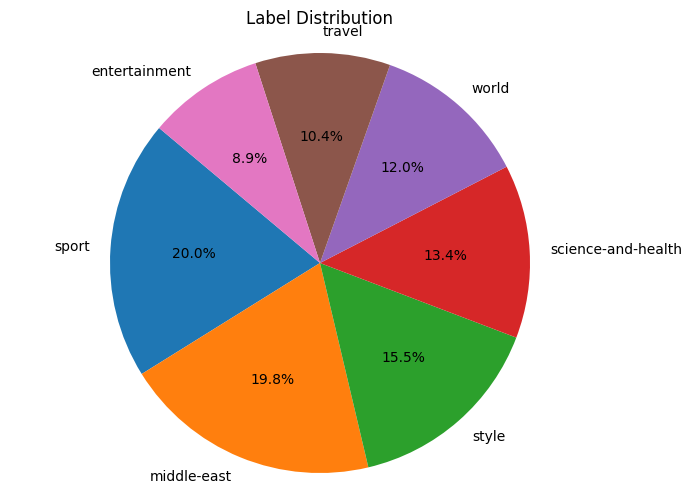

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the new column names
new_column_names = ['title', 'label','article_date', 'category_name','article_url', 'article_content']

# Load the CSV file and redefine the column names
df = pd.read_csv('CNN-ARABIA-FINAL.csv', names=new_column_names)

# Clean duplicates
df.drop_duplicates(inplace=True)

# Save the cleaned CSV file
df.to_csv('CNN-ARABIA-CLEANED.csv', index=False)

# Pie chart for label distribution
label_counts = df['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Label Distribution')
plt.axis('equal')
plt.show()



In [3]:
# Load the CSV file and redefine the column names
df = pd.read_csv('CNN-ARABIA-CLEANED.csv', names=new_column_names)

# Display the head of the cleaned data
print("Head of the cleaned data:")
print(df.head())

# Display the shape of the cleaned data
print("\nShape of the cleaned data:", df.shape)

Head of the cleaned data:
                 title        label  \
0                title        label   
1  2024-04-13 21:14:10  middle-east   
2  2024-04-13 21:19:15  middle-east   
3  2024-04-13 21:19:17  middle-east   
4  2024-04-13 21:19:20  middle-east   

                                        article_date  \
0                                       article_date   
1  https://arabic.cnn.com/middle-east/article/202...   
2  https://arabic.cnn.com/middle-east/article/202...   
3  https://arabic.cnn.com/middle-east/article/202...   
4  https://arabic.cnn.com/middle-east/article/202...   

                                       category_name          article_url  \
0                                      category_name          article_url   
1  دبي، الإمارات العربية المتحدة (CNN)-- أعلنت هي...  2024-04-13 20:28:53   
2  (CNN)-- دعا البيت الأبيض إيران إلى الإفراج عن ...                  NaN   
3  القدس (CNN)-- قال شهود عيان لشبكة CNN، السبت، ...                  NaN   
4  (CNN)-- شهد فر